<a href="https://colab.research.google.com/github/JohnTaco93/IMS_training/blob/main/ex8_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#%% Change to the root directory
# Example:
#os.chdir("C:/Users/Desktop/LAMDATA")
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
cd /content/gdrive/My Drive/colab taco/IMS_training/Exercise8_python_Trainee

/content/gdrive/My Drive/colab taco/IMS_training/Exercise8_python_Trainee


In [4]:
ls

B05_Features.csv  ex8_main.ipynb  Lecture_Non-Linear_RUL_Prediction.pdf
B06_Features.csv  ex8_main.py     References/
B07_Features.csv  ex8_readme.pdf


In [6]:
'''
%% IMS TRAINING Exercise 8: 
    RUL-prediction using non-linear regression
    
    
% OBJECTIVE
% ------------
% This exercise will focus on performing remianing useful life (RUL) prediction
% based on non-linear regresison. 


% ABOUT THE DATA
% ------------
The dataset considered in this exercise is NASA Li-ion battery dataset.

Li-ion batteries were run through 3 different operational profiles (charge, discharge and
impedance) at 24 degree Celsius. Charging was carried out in a constant current (CC) mode at
1.5A until the battery voltage reached 4.2V and then continued in a constant voltage (CV) mode
until the charge current dropped to 20mA. Discharge was carried out using a CC 2A, until the
battery voltage fell to 2.7V, 2.5V and 2.2V for batteries 5, 6 and 7 respectively.
Impedance measurement was carried out through an electrochemical impedance spectroscopy
(EIS) frequency sweep from 0.1Hz to 5kHz. The threshold is 70% of the original capacity.

To keep the focus on learning to use non-linear regression, features extracted
 from the discharning operation cycles are provided from 3 batteries: B05, B06, and B07.
 Labels of the features are also provided.

'''


 
#%%
# Import necesaary python libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import warnings

#%% load the data 
'''
Use the read_csv function in the pandas library 
to import the csv file as a dataframe df.
Use 'header = None', if the csv file does not have a header,
or 'header = 0', if the first column are column names.

Example: 
    df = pd.read_csv("FILENAME", header=0)
'''

cwd = os.getcwd()
print("Current Working Directory is:", cwd)

B05_Features = []
B06_Features = []
B07_Features = []

#% ================= Your Code Here ====================
B05_Features=pd.read_csv("B05_Features.csv", header=0)
B06_Features=pd.read_csv("B06_Features.csv", header=0)
B07_Features=pd.read_csv("B07_Features.csv", header=0)

Current Working Directory is: /content/gdrive/My Drive/colab taco/IMS_training/Exercise8_python_Trainee


In [7]:
B05_Features.head()

,Time_Stamp,Capacity,Capacitance,Sample_Number,Ambient_Temperature,Time_Since_Last_Discharge,Capacitance_Drop,Discharging_Time,Max_Temperature,Temperature_P2P,Minimum_Temperature,Temperature_Rate,Min_Voltage,Average_Load
0,733500.642843,1.856487,1.000000,2,24,0.000000,0.000000,3311.234,38.904112,14.515027,24.389085,0.004377,2.612467,2.638011
1,733500.822088,1.846327,0.994527,4,24,0.179246,0.010160,3293.125,38.934590,14.196458,24.738132,0.004305,2.587209,2.633028
2,733501.000772,1.835349,0.988614,6,24,0.178684,0.010978,3273.656,38.743649,13.952199,24.791450,0.004255,2.651917,2.632949
3,733501.178210,1.835263,0.988567,8,24,0.177439,0.000087,3273.969,38.672511,13.974647,24.697864,0.004263,2.592948,2.630705
4,733501.356547,1.834646,0.988235,10,24,0.178337,0.000617,3272.032,38.558828,13.987204,24.571624,0.004270,2.547420,2.630949


In [9]:
#% =====================================================

#%% Extract Feature Description
'''
Extract the desciption of the features, 
stored as column names in the dataframe, as a list.
Example: 
    lst = df.columns
    lst = lst.tolist()
'''
FeatureLabels = []
#% ================= Your Code Here ====================
FeatureLabels=B05_Features.columns
FeatureLabels = FeatureLabels.tolist()

In [8]:
B05_Features.head()

,Time_Stamp,Capacity,Capacitance,Sample_Number,Ambient_Temperature,Time_Since_Last_Discharge,Capacitance_Drop,Discharging_Time,Max_Temperature,Temperature_P2P,Minimum_Temperature,Temperature_Rate,Min_Voltage,Average_Load
0,733500.642843,1.856487,1.000000,2,24,0.000000,0.000000,3311.234,38.904112,14.515027,24.389085,0.004377,2.612467,2.638011
1,733500.822088,1.846327,0.994527,4,24,0.179246,0.010160,3293.125,38.934590,14.196458,24.738132,0.004305,2.587209,2.633028
2,733501.000772,1.835349,0.988614,6,24,0.178684,0.010978,3273.656,38.743649,13.952199,24.791450,0.004255,2.651917,2.632949
3,733501.178210,1.835263,0.988567,8,24,0.177439,0.000087,3273.969,38.672511,13.974647,24.697864,0.004263,2.592948,2.630705
4,733501.356547,1.834646,0.988235,10,24,0.178337,0.000617,3272.032,38.558828,13.987204,24.571624,0.004270,2.547420,2.630949


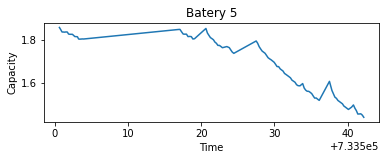

In [13]:
#%% Use codes from homework 01 to visualize loaded features
#% ================= Your Code Here ====================
plt.subplot(2,1,1)
plt.plot(B05_Features['Time_Stamp'],B05_Features['Capacity'])
plt.xlabel('Time');
plt.ylabel('Capacity');
plt.title('Batery 5');

#% =====================================================

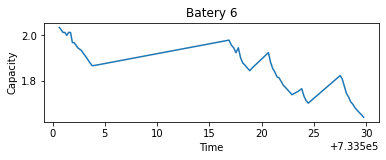

In [14]:
#%% Use codes from homework 01 to visualize loaded features
#% ================= Your Code Here ====================
plt.subplot(2,1,1)
plt.plot(B06_Features['Time_Stamp'],B06_Features['Capacity'])
plt.xlabel('Time');
plt.ylabel('Capacity');
plt.title('Batery 6');

#% =====================================================

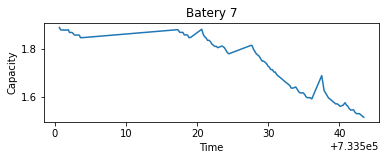

In [15]:
#%% Use codes from homework 01 to visualize loaded features
#% ================= Your Code Here ====================
plt.subplot(2,1,1)
plt.plot(B07_Features['Time_Stamp'],B07_Features['Capacity'])
plt.xlabel('Time');
plt.ylabel('Capacity');
plt.title('Batery 7');


In [24]:
#%% For convenience, let's use features from one battery at a time to perform 
# RUL prediction based on nonlinear regression. Since battery capacity value 
# indicates its performance, when the capacity drops to 1.4 Ahr (30% degradation),
# the battery can be considered failure.


#%% Extract Data for analysis: 
# Let's focus first on Battery 5. Extract the feature values for Battery 5

'''
Extract the values of the features as a numpy matrix from the data frame.
Remember to use dataframe of Battery 5.
Example: 
    data = df.values
'''
Features = []
BatteryNo = 5
#% ================= Your Code Here ====================

data = B05_Features.values

In [25]:
B05_Features.head()

,Time_Stamp,Capacity,Capacitance,Sample_Number,Ambient_Temperature,Time_Since_Last_Discharge,Capacitance_Drop,Discharging_Time,Max_Temperature,Temperature_P2P,Minimum_Temperature,Temperature_Rate,Min_Voltage,Average_Load
0,733500.642843,1.856487,1.000000,2,24,0.000000,0.000000,3311.234,38.904112,14.515027,24.389085,0.004377,2.612467,2.638011
1,733500.822088,1.846327,0.994527,4,24,0.179246,0.010160,3293.125,38.934590,14.196458,24.738132,0.004305,2.587209,2.633028
2,733501.000772,1.835349,0.988614,6,24,0.178684,0.010978,3273.656,38.743649,13.952199,24.791450,0.004255,2.651917,2.632949
3,733501.178210,1.835263,0.988567,8,24,0.177439,0.000087,3273.969,38.672511,13.974647,24.697864,0.004263,2.592948,2.630705
4,733501.356547,1.834646,0.988235,10,24,0.178337,0.000617,3272.032,38.558828,13.987204,24.571624,0.004270,2.547420,2.630949


In [26]:
#% =====================================================

# The trainee can later change the battery number (BatteryNo)
# to evaluate the performance for other batteries.


#%% Scale Battery Capacilty, and use the signal as train_data
'''
Divide the entire signal by the first value of the signal. This denotes how much
the value of the signal has grown over time.

In this example, we will use only one of the feature to fit the non-linear regression model.
Here we are choosing the battery 'Capacity' as the signal. It is important to identify the 
signal using the column headers and use the appropriate column index to select the signal.

Example: 
    dataScaled = data[:, 1]/data[0, 1]
'''

data_train = []
#% ================= Your Code Here ====================
data_train = data[:, 1]/data[0, 1]

In [35]:
#% =====================================================
#%% NON_LINEAR REGRESSION: exponential 
# Step 0: prepare the index for the data we want to fit. 
# The y_data in this case is data_train.
'''
Let the x_data (independent variable) for regression be the index of the y_data (dependent variable).
Create a numpy array of the indices.

Example:
    x_data = np.arange(np.size(y_data))
'''

t = []
#% ================= Your Code Here ====================
#data_train=dataScaled.copy()
t = np.arange(np.size(data_train))

In [36]:
#% =====================================================
#%% Step 1: create a exponential function to fit the data
'''
Defining the non-linear mathematical function to be used, and creating a 
python function to use it here.

Note: In this case, the exponential function is used and is defined as shown below.
'''

def func(x, b0, b1, b2, b3):
    return  b0*(np.exp(b1*x + b2))+b3

In [37]:
#%% Step 2: choose initial values of the parameters of the non-linear function
'''
NOTE: Usually the initial values of the parameters are chosen based on experience or
 the characteristics of data, otherwise, it's recommended to select random values 
 or use methods such as Genetic Algorithm (GA) with bounds to make initial guesses.
 The followinng code shows an implementation of the intial guesses of the paramters 
 using GA with bounds.
 
 Even in this process, the bounds can have an impact on the quality and 
 feasibility of the solution. the trainee is encouraged to explore changing the
 values of the initial guess and observe the changes in the evaluated solutions.
'''
    
# function for genetic algorithm to minimize (sum of squared error)
def sumOfSquaredError(parameterTuple):
    
    # to avoid printing warnings by genetic algorithm
    warnings.filterwarnings("ignore")  
    
    # evaluate the output of the func using candidate parameters and input (t)        
    val = func(t, *parameterTuple) 

    # calculate error term for evaluated output and actual output (data_train)
    return np.sum((data_train - val)**2.0)

def generate_Initial_Parameters():
    
    # min and max used for bounds
    maxX = max(t)
    minX = min(t)
    maxY = max(data_train)
    minY = min(data_train)

    # calcuate the parameter bounds
    parameterBounds = []
    parameterBounds.append([minX, maxX]) # search bounds for b1
    parameterBounds.append([minX, maxX]) # search bounds for b2
    parameterBounds.append([maxX, maxX]) # search bounds for b3
    parameterBounds.append([minY, maxY]) # search bounds for b4

    # Use the differential_evolution function to calculate the inital guesses of the parameters.
    result = differential_evolution(sumOfSquaredError, parameterBounds, seed = 3)
    return result.x

# generate initial parameter values
b_init = generate_Initial_Parameters()


In [41]:
#%% Step 3: fit the nonlinear model to data using the initial values in beta0
'''
Use the curve_fit function from scipy to fit the data into the defined function
 using the initial guesses. Detailed description of the function can be found at
 https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
 
 Example:
     param_out, pcov = curve_fit(func, x_data, y_data, param_init)
     
     where:
         param_out: optimal values of the params
         pcov: estimated covariance of the parameters to evaluate the confidence limit on the params
         func: model function (exponential in this case)
         x_data: input data or independent variable
         y_data: measured data or dependent variable
         param_init: the initial guess for the parameters
'''
beta_out = []
beta_cov = []
#% ================= Your Code Here ====================
beta_out, beta_cov = curve_fit(func, xdata=t, ydata=data_train, p0=b_init)

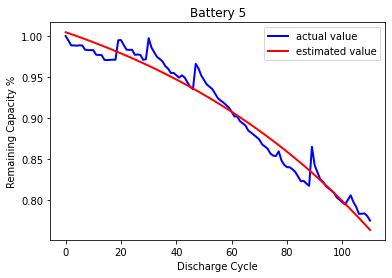

In [46]:
#% =====================================================
#% generate the estimated value based on the nonlinear model
'''
Estimate the value of the function based on the optimized parameters for the same input values.

Example:
    estimated_value = func(x_data, beta[0], beta[1], beta[2], beta[3])
'''

estimated_value = []
#% ================= Your Code Here ====================
estimated_value = func(t, beta_out[0], beta_out[1], beta_out[2], beta_out[3])


#% =====================================================

# Visualize the fitted curve
plt.figure(1)
plt.plot(t, data_train, 'b', linewidth=2, label = 'actual value')
plt.plot(t, estimated_value, 'r', linewidth=2, label = 'estimated value')
plt.xlabel('Discharge Cycle')
plt.ylabel('Remaining Capacity %')
plt.title('Battery '+str(BatteryNo));
plt.legend()

In [47]:
#%% Step 4: perform prediction using the nonlinear model

# Select a value of the number of steps ahead to predict
# The trainee can try to evaluate the predictions for different steps by changin this value.
steps = 55

#% determine the index of the prediction
'''
Similar to input 't', create a indices for which predictions have to be made.
For example, the following code shows how to create indices 'steps' point ahead 
from the last known point of measurement.

Example:
    x_data_predict = np.linspace(x_data[-1], x_data[-1]+steps, steps+1)

'''
t_predict = []
#% ================= Your Code Here ====================
t_predict = np.linspace(t[-1], t[-1]+steps, steps+1)

In [49]:
#% =====================================================
#% generate the prediction value based on the nonlinear model
'''
Predict the value of the function based on the optimized parameters and idex of prediction.

Example:
   predicted_value = func(x_data_predict, beta[0], beta[1], beta[2], beta[3])
'''
predicted_value = []
#% ================= Your Code Here ====================
predicted_value = func(t_predict, beta_out[0], beta_out[1], beta_out[2], beta_out[3])

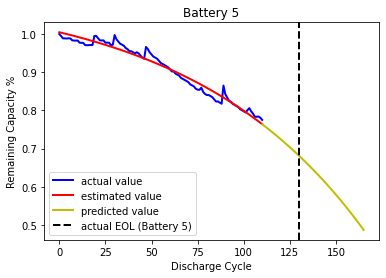

In [50]:
#% =====================================================
#%% Step 5: Visualize the prediction
plt.figure(2)
plt.plot(t, data_train, 'b', linewidth=2, label = 'actual value')
plt.plot(t, estimated_value, 'r', linewidth=2, label = 'estimated value')
plt.plot(t_predict, predicted_value, 'y', linewidth=2, label = 'predicted value')
plt.xlabel('Discharge Cycle')
plt.ylabel('Remaining Capacity %')
plt.title('Battery '+str(BatteryNo));

# Add Actual End of Life for Battery 5.
plt.axvline(x=130, linewidth=2, c='k', linestyle='--', label = 'actual EOL (Battery 5)')

plt.legend()